In [25]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples

In [26]:
births = Table.read_table('data/baby.csv')

In [27]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [29]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
# smoking_and_birthweight is a smaller table containing just the two columns above
# reminder: birth weight is baby's weight when born, in ounces
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [30]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


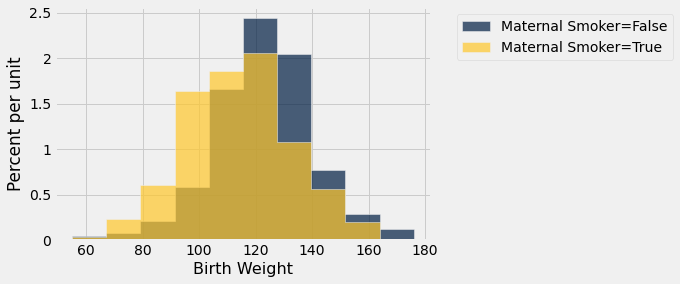

In [31]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')
# what do you observe in the histogram below?
# do you see any trends or patterns?



# Test Statistic

[Question] What values of our statistic are in favor of the alternative: positive or negative?

In [ ]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

In [ ]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

In [ ]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(...)  
    
    # table containing group means
    means_table = reduced.group(...)
    # array of group means
    means = means_table....
    
    return ...

In [ ]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

# Random Permutation (Shuffling)

In [ ]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [ ]:
letters.sample()

In [ ]:
letters.sample(with_replacement = False)

In [ ]:
letters.with_column('Shuffled', letters.sample(with_replacement = False).column(0))

# Simulation Under Null Hypothesis

In [ ]:
smoking_and_birthweight

In [ ]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False
                                                ).column('Maternal Smoker')

In [ ]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [ ]:
original_and_shuffled

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

# Permutation Test

In [ ]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    )....
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
        ...)
    
    return difference_of_means(...)   

In [ ]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

In [ ]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');